## Breast Cancer Analysis


<img src="https://images.theconversation.com/files/154957/original/image-20170131-13238-b00n65.jpg?ixlib=rb-1.1.0&q=45&auto=format&w=926&fit=clip" width="800px">

**Installing the libraries**

In [1]:
# for basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for interactive visualizations
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)

# for providing path
import os
print(os.listdir('../input'))

['data.csv']


**Importing the dataset**

In [2]:
data = pd.read_csv('../input/data.csv')

# getting the shape
print(data.shape)

(569, 33)


In [3]:
# checking the  head of the dataset

data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# removing the last column as it is empty

data = data.drop(['id', 'Unnamed: 32'], axis = 1)

print(data.columns)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [5]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [6]:
# checking if there is any null values in the data

data.isnull().sum().sum()

0


<img src="https://nebula.wsimg.com/5e2df8a3639e3f09b768e2a901a495a9?AccessKeyId=37731306716C64A3AE02&disposition=0&alloworigin=1" width="300px">

## Data Visualization

In [7]:
# checking the different values contained in the diagnosis column

diagnosis = data['diagnosis'].value_counts()

diagnosis_label = diagnosis.index
diagnosis_size = diagnosis.values

colors = ['pink', 'lightgreen']

trace = go.Pie(labels = diagnosis_label,
              values = diagnosis_size,
               marker = dict(colors = colors),
               name = 'Breast Cancer',
               hole = 0.3
              )
df = [trace]
layout = go.Layout(title = 'Distribution of Patients')

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)

Here, B referes to benign which means the cells are safe from cancer
whereas M refers to Malign which means the cell is very much dangerous and venomous can lead to breast cancer

We have to train the data in such a way that it can predict the status of the cells
that whether they are M(malign) or B(Benign).

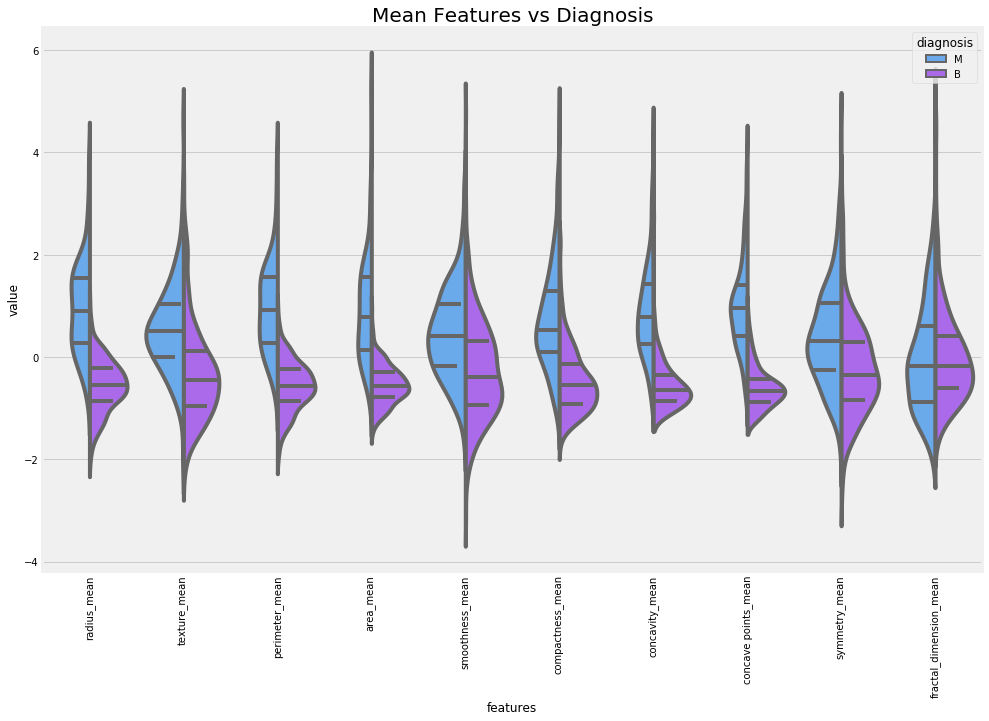

In [8]:
y = data['diagnosis']
x = data.drop('diagnosis', axis = 1)

x = (x - x.mean()) / (x.std()) 
df = pd.concat([y, x.iloc[:,0:10]], axis=1)
df = pd.melt(df, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15, 10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=df,split=True, inner="quart", palette = 'cool')
plt.title('Mean Features vs Diagnosis', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

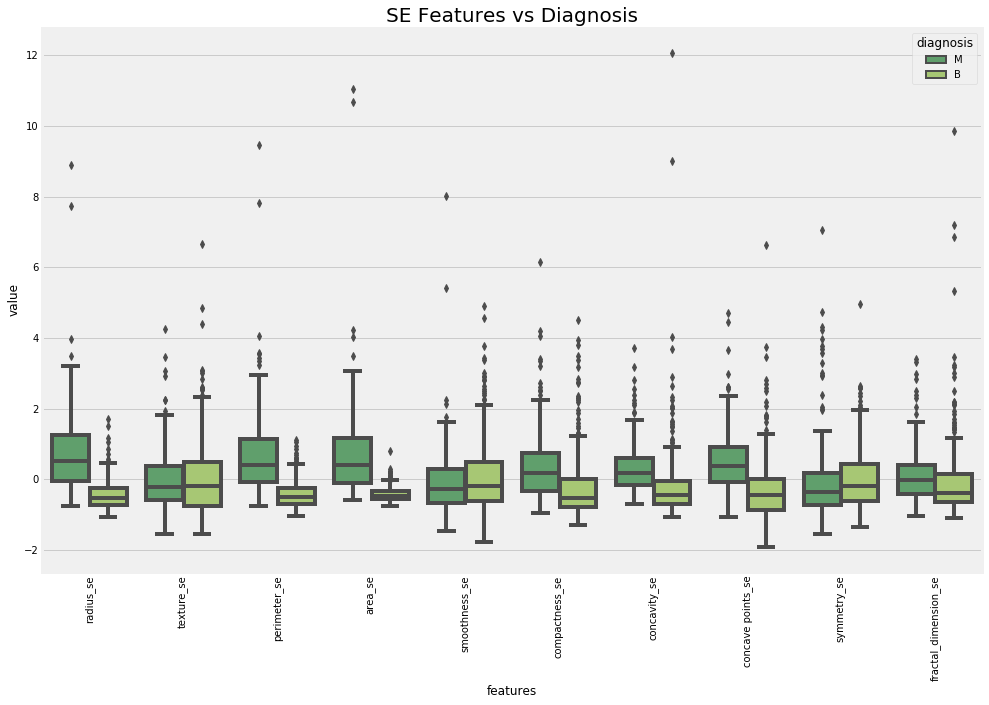

In [9]:
y = data['diagnosis']
x = data.drop('diagnosis', axis = 1)

x = (x - x.mean()) / (x.std()) 
df = pd.concat([y, x.iloc[:,10:20]], axis=1)
df = pd.melt(df, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15, 10))
sns.boxplot(x="features", y="value", hue="diagnosis", data=df, palette = 'summer')
plt.title('SE Features vs Diagnosis', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

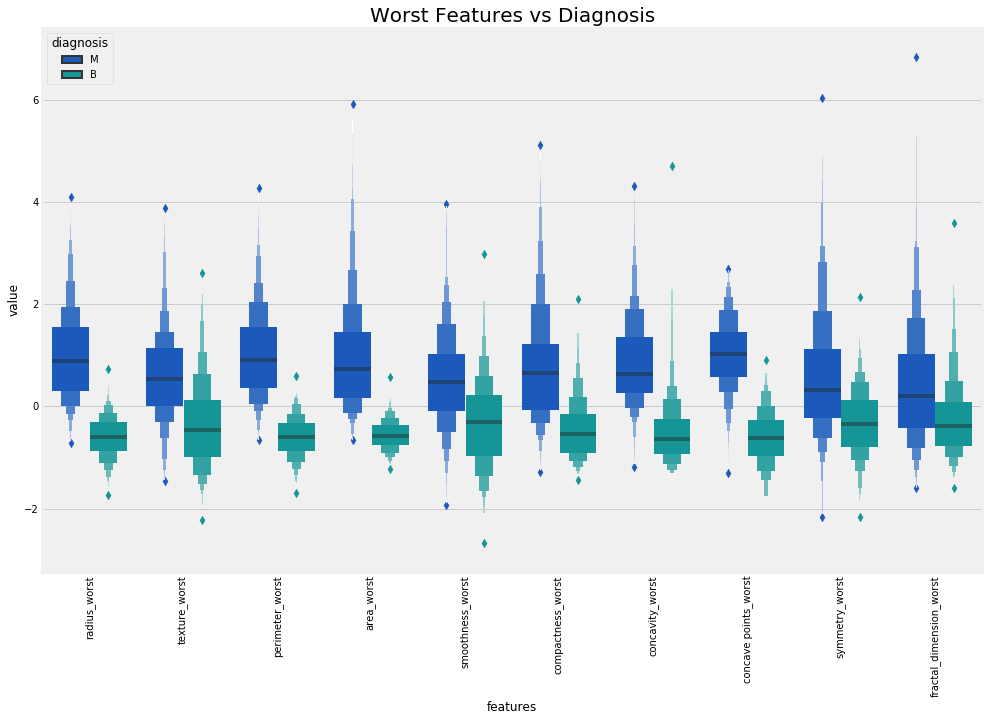

In [10]:
y = data['diagnosis']
x = data.drop('diagnosis', axis = 1)

x = (x - x.mean()) / (x.std()) 
df = pd.concat([y, x.iloc[:,20:30]], axis=1)
df = pd.melt(df, id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(15, 10))
sns.boxenplot(x="features", y="value", hue="diagnosis", data=df, palette = 'winter')
plt.title('Worst Features vs Diagnosis', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

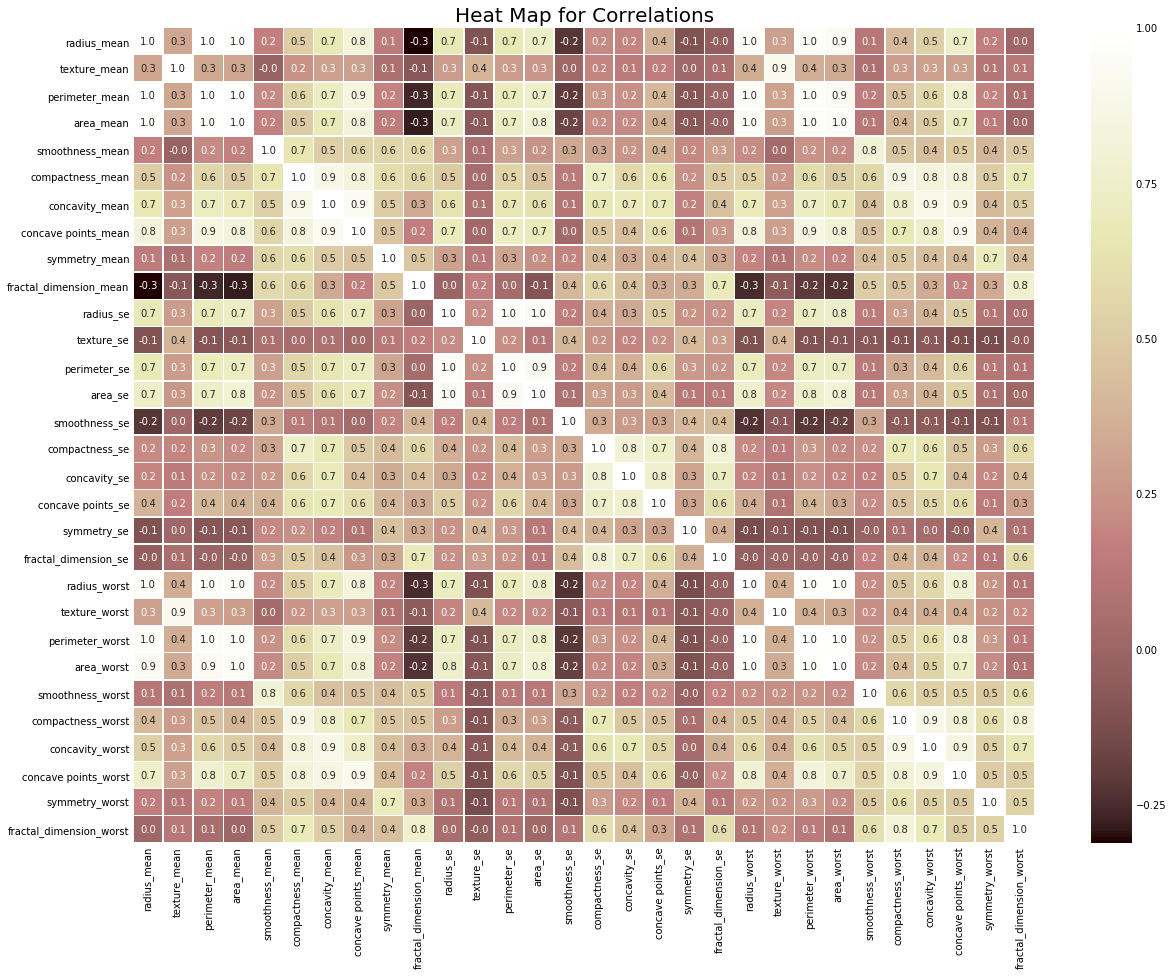

In [11]:
plt.rcParams['figure.figsize'] = (18, 15)

sns.heatmap(data.corr(), cmap = 'pink', annot = True, linewidths = 0.5, fmt = '.1f')
plt.title('Heat Map for Correlations', fontsize = 20)
plt.show()

From the above correlation plot we can easily figure out that items which are very much related to each other and the items which are less related to each other

It tells us the degree of relativity amongst all the data items present on the dataset

For Example,
fractal_dimension_mean and smoothness mean are highly related 
whereas texture_se and fractal-dimension_mean are very less related to each other.

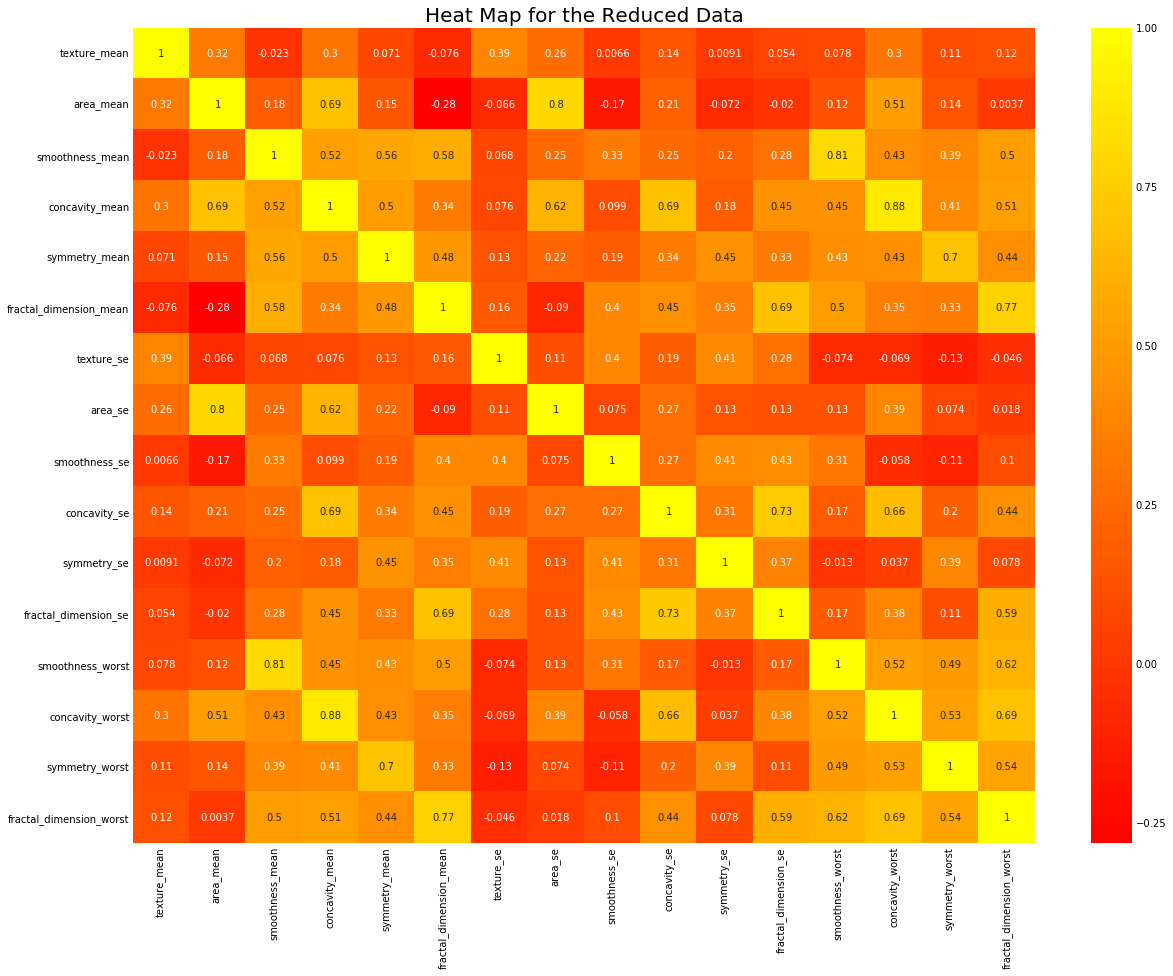

In [12]:
list_to_delete = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean',
                  'radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst',
                  'concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x = x.drop(list_to_delete, axis = 1)

plt.rcParams['figure.figsize'] = (18, 15)
sns.heatmap(x.corr(), annot = True, cmap = 'autumn')
plt.title('Heat Map for the Reduced Data', fontsize = 20)
plt.show()

**Data preprocessing**

In [13]:
# label encoding of the dependent variable

# importing label encoder
from sklearn.preprocessing import LabelEncoder

# performing label encoding
le = LabelEncoder()
y= le.fit_transform(y)

In [14]:
#splitting the dataset into training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 16)

print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (426, 16)
Shape of y_train : (426,)
Shape of x_test : (143, 16)
Shape of y_test : (143,)


## Modelling

**Random Forest**

Training accuracy : 1.0
Testing accuarcy : 0.986013986013986
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        91
           1       0.98      0.98      0.98        52

   micro avg       0.99      0.99      0.99       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.99      0.99      0.99       143



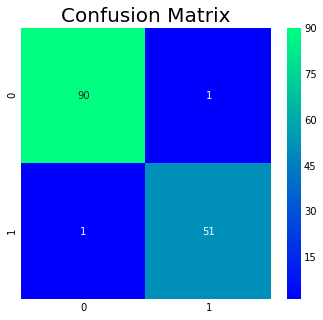

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# creating a model
model = RandomForestClassifier(n_estimators = 400, max_depth = 10)

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# Calculating the accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuarcy :", model.score(x_test, y_test))

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

# confusion matrix 
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'winter')
plt.title('Confusion Matrix', fontsize = 20)
plt.show()

## Using RFECV

In [16]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
model = RandomForestClassifier() 
rfecv = RFECV(estimator = model, step = 1, cv = 5, scoring = 'accuracy')
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 10
Best features : Index(['texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean',
       'fractal_dimension_mean', 'area_se', 'concavity_se', 'smoothness_worst',
       'concavity_worst', 'symmetry_worst'],
      dtype='object')


Training Accuracy : 0.9976525821596244
Testing Accuracy : 0.9440559440559441


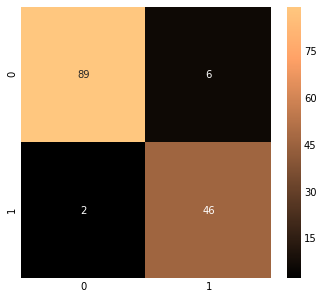

In [17]:
y_pred = rfecv.predict(x_test)

print("Training Accuracy :", rfecv.score(x_train, y_train))
print("Testing Accuracy :", rfecv.score(x_test, y_test))

cm = confusion_matrix(y_pred, y_test)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, cmap = 'copper')
plt.show()